In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# mutual_info_classif, mutual_info_regression: Functions for calculating Mutual Information Between classes and the target
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.shape

(40, 31)

In [3]:

df.head()

,Unnamed: 0,no_strokes_st,no_strokes_dy,speed_st,speed_dy,magnitude_vel_st,magnitude_horz_vel_st,magnitude_vert_vel_st,magnitude_vel_dy,magnitude_horz_vel_dy,...,magnitude_horz_jerk_dy,magnitude_vert_jerk_dy,ncv_st,ncv_dy,nca_st,nca_dy,in_air_stcp,on_surface_st,on_surface_dy,target
0,0,2.0,2.0,0.010988,0.009758,0.167357,0.116687,0.094172,0.201030,0.138797,...,0.000006,0.000004,143.166667,308.000000,28.000000,65.000000,176.0,952.0,689.0,1.0
1,1,52.0,10.0,0.006874,0.006669,0.082170,0.053652,0.050760,0.071314,0.047286,...,0.000004,0.000003,317.000000,345.200000,81.000000,83.333333,0.0,2107.0,2506.0,1.0
2,2,22.0,12.0,0.001636,0.001620,0.128316,0.083959,0.079109,0.068212,0.042802,...,0.000003,0.000003,205.714286,262.285714,53.666667,83.000000,206.0,1369.0,2807.0,1.0
3,3,2.0,6.0,0.001793,0.001434,0.041127,0.026362,0.025751,0.059535,0.037716,...,0.000002,0.000002,315.714286,299.666667,212.000000,285.000000,705.0,4025.0,2487.0,1.0
4,4,4.0,6.0,0.010127,0.009184,0.054456,0.035698,0.033174,0.076065,0.049734,...,0.000002,0.000002,210.300000,319.500000,67.200000,262.000000,1221.0,2712.0,2337.0,1.0


In [4]:
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [6]:
data = df[numerical_features]

data.head()

,Unnamed: 0,no_strokes_st,no_strokes_dy,speed_st,speed_dy,magnitude_vel_st,magnitude_horz_vel_st,magnitude_vert_vel_st,magnitude_vel_dy,magnitude_horz_vel_dy,...,magnitude_horz_jerk_dy,magnitude_vert_jerk_dy,ncv_st,ncv_dy,nca_st,nca_dy,in_air_stcp,on_surface_st,on_surface_dy,target
0,0,2.0,2.0,0.010988,0.009758,0.167357,0.116687,0.094172,0.201030,0.138797,...,0.000006,0.000004,143.166667,308.000000,28.000000,65.000000,176.0,952.0,689.0,1.0
1,1,52.0,10.0,0.006874,0.006669,0.082170,0.053652,0.050760,0.071314,0.047286,...,0.000004,0.000003,317.000000,345.200000,81.000000,83.333333,0.0,2107.0,2506.0,1.0
2,2,22.0,12.0,0.001636,0.001620,0.128316,0.083959,0.079109,0.068212,0.042802,...,0.000003,0.000003,205.714286,262.285714,53.666667,83.000000,206.0,1369.0,2807.0,1.0
3,3,2.0,6.0,0.001793,0.001434,0.041127,0.026362,0.025751,0.059535,0.037716,...,0.000002,0.000002,315.714286,299.666667,212.000000,285.000000,705.0,4025.0,2487.0,1.0
4,4,4.0,6.0,0.010127,0.009184,0.054456,0.035698,0.033174,0.076065,0.049734,...,0.000002,0.000002,210.300000,319.500000,67.200000,262.000000,1221.0,2712.0,2337.0,1.0


In [10]:
X = data.drop(['target','Unnamed: 0'], axis=1)
X.head()

,no_strokes_st,no_strokes_dy,speed_st,speed_dy,magnitude_vel_st,magnitude_horz_vel_st,magnitude_vert_vel_st,magnitude_vel_dy,magnitude_horz_vel_dy,magnitude_vert_vel_dy,...,magnitude_jerk_dy,magnitude_horz_jerk_dy,magnitude_vert_jerk_dy,ncv_st,ncv_dy,nca_st,nca_dy,in_air_stcp,on_surface_st,on_surface_dy
0,2.0,2.0,0.010988,0.009758,0.167357,0.116687,0.094172,0.201030,0.138797,0.114738,...,0.000008,0.000006,0.000004,143.166667,308.000000,28.000000,65.000000,176.0,952.0,689.0
1,52.0,10.0,0.006874,0.006669,0.082170,0.053652,0.050760,0.071314,0.047286,0.043804,...,0.000005,0.000004,0.000003,317.000000,345.200000,81.000000,83.333333,0.0,2107.0,2506.0
2,22.0,12.0,0.001636,0.001620,0.128316,0.083959,0.079109,0.068212,0.042802,0.043473,...,0.000004,0.000003,0.000003,205.714286,262.285714,53.666667,83.000000,206.0,1369.0,2807.0
3,2.0,6.0,0.001793,0.001434,0.041127,0.026362,0.025751,0.059535,0.037716,0.038586,...,0.000004,0.000002,0.000002,315.714286,299.666667,212.000000,285.000000,705.0,4025.0,2487.0
4,4.0,6.0,0.010127,0.009184,0.054456,0.035698,0.033174,0.076065,0.049734,0.048427,...,0.000003,0.000002,0.000002,210.300000,319.500000,67.200000,262.000000,1221.0,2712.0,2337.0


In [11]:
y = data['target']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28, 29), (28,), (12, 29), (12,))

In [13]:
mutual_info = mutual_info_classif(X_train.fillna(0), y_train)
mutual_info

array([0.        , 0.07051071, 0.23629349, 0.19165063, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12084867, 0.10715819, 0.0396221 , 0.1922369 , 0.12739846,
       0.23007704, 0.22825166, 0.20603986, 0.27141165, 0.21645564,
       0.20744203, 0.26367786, 0.        , 0.05145873, 0.        ,
       0.01531799, 0.25891154, 0.        , 0.        ])

In [14]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

magnitude_vert_jerk_st    0.271412
magnitude_vert_jerk_dy    0.263678
in_air_stcp               0.258912
speed_st                  0.236293
magnitude_vert_acc_dy     0.230077
magnitude_jerk_st         0.228252
magnitude_jerk_dy         0.216456
magnitude_horz_jerk_dy    0.207442
magnitude_horz_jerk_st    0.206040
magnitude_acc_dy          0.192237
speed_dy                  0.191651
magnitude_horz_acc_dy     0.127398
magnitude_acc_st          0.120849
magnitude_horz_acc_st     0.107158
no_strokes_dy             0.070511
ncv_dy                    0.051459
magnitude_vert_acc_st     0.039622
nca_dy                    0.015318
magnitude_vert_vel_st     0.000000
magnitude_vel_st          0.000000
magnitude_horz_vel_st     0.000000
on_surface_dy             0.000000
magnitude_vel_dy          0.000000
magnitude_horz_vel_dy     0.000000
magnitude_vert_vel_dy     0.000000
on_surface_st             0.000000
ncv_st                    0.000000
nca_st                    0.000000
no_strokes_st       

<AxesSubplot:>

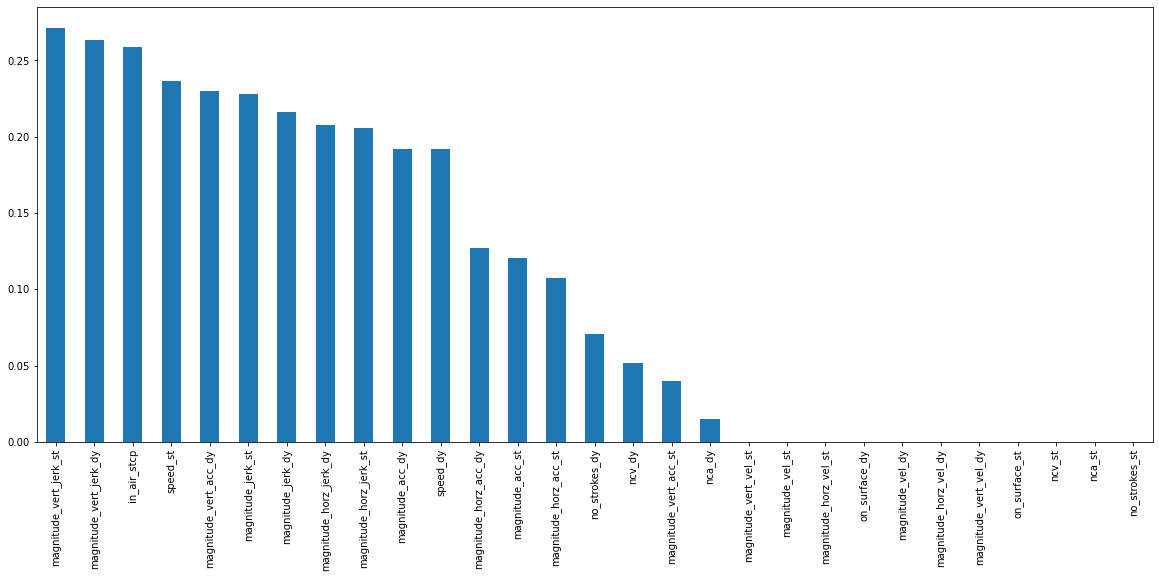

In [15]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [16]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
print('Selected top 10 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 10 features: Index(['speed_st', 'magnitude_acc_dy', 'magnitude_vert_acc_dy',
       'magnitude_jerk_st', 'magnitude_horz_jerk_st', 'magnitude_vert_jerk_st',
       'magnitude_jerk_dy', 'magnitude_horz_jerk_dy', 'magnitude_vert_jerk_dy',
       'in_air_stcp'],
      dtype='object')


In [17]:
#Mutual Information using Regression
df = pd.read_csv('data.csv')
df.shape

(40, 31)

In [18]:
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)
data = df[numerical_features]

In [20]:
X = data.drop(['target','Unnamed: 0'], axis=1)
y = data['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28, 29), (28,), (12, 29), (12,))

In [22]:
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.00215935, 0.01214582, 0.26653489, 0.22189203, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12084867, 0.09736382, 0.0396221 , 0.1922369 , 0.12739846,
       0.23007704, 0.22825166, 0.20603986, 0.27141165, 0.21848872,
       0.20744203, 0.27937844, 0.        , 0.05145873, 0.        ,
       0.00638941, 0.23702709, 0.        , 0.        ])

In [23]:
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

magnitude_vert_jerk_dy    0.279378
magnitude_vert_jerk_st    0.271412
speed_st                  0.266535
in_air_stcp               0.237027
magnitude_vert_acc_dy     0.230077
magnitude_jerk_st         0.228252
speed_dy                  0.221892
magnitude_jerk_dy         0.218489
magnitude_horz_jerk_dy    0.207442
magnitude_horz_jerk_st    0.206040
magnitude_acc_dy          0.192237
magnitude_horz_acc_dy     0.127398
magnitude_acc_st          0.120849
magnitude_horz_acc_st     0.097364
ncv_dy                    0.051459
magnitude_vert_acc_st     0.039622
no_strokes_dy             0.012146
nca_dy                    0.006389
no_strokes_st             0.002159
magnitude_vert_vel_dy     0.000000
magnitude_horz_vel_dy     0.000000
magnitude_vel_dy          0.000000
magnitude_vert_vel_st     0.000000
magnitude_horz_vel_st     0.000000
magnitude_vel_st          0.000000
on_surface_st             0.000000
ncv_st                    0.000000
nca_st                    0.000000
on_surface_dy       

<AxesSubplot:>

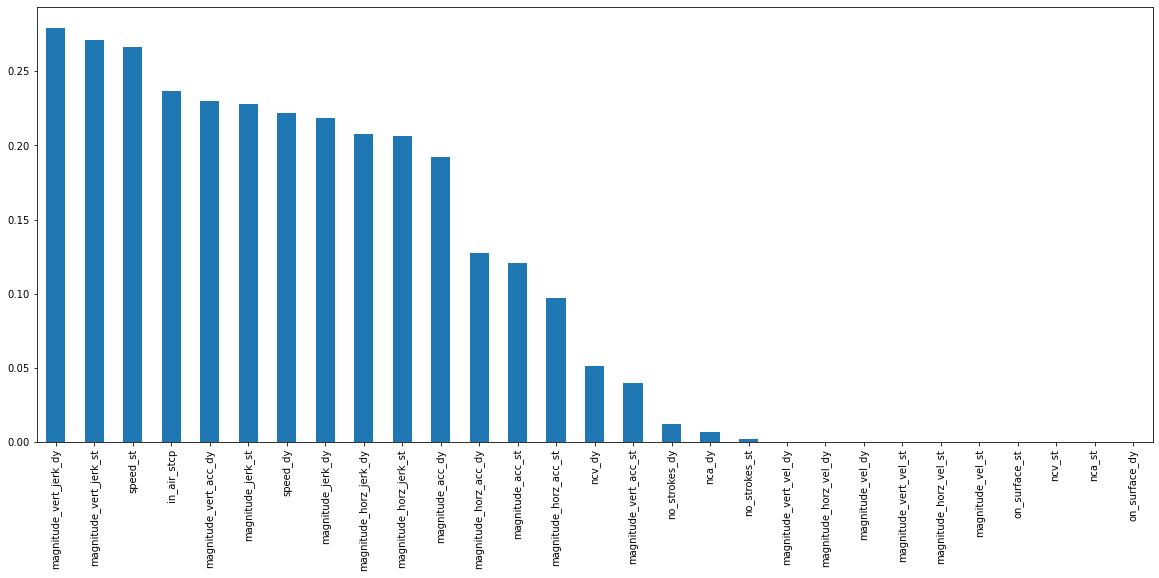

In [24]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [25]:
# Select K best features
k_percentile_features = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train.fillna(0), y_train)
print('Selected top 10 percentile features: {}'.format(X_train.columns[k_percentile_features.get_support()]))

Selected top 10 percentile features: Index(['magnitude_vert_jerk_st', 'magnitude_vert_jerk_dy', 'in_air_stcp'], dtype='object')
